# **Deep Learning Homework 6: *Variational Autoencoders***
### MSc Computer Science, Data Science, Cybersecurity Computer Engeneering @UniPD
### 2nd semester - 6 ECTS
### Prof. Nicolò Navarin & Prof. Alessandro Sperduti
---

In this homework, we will explore how to develop a Variational Autoencoder (VAE). As a dataset, we will use the MNIST dataset. In developing the VAE we also explore how to develop an ad-hoc layer and a custom training step.

**NOTE**: in order to run this notebook without problems, please connect to a *GPU runtime*. You can do so by clicking on the RAM / Disk icon in the upper right part of the notebook, then on *Change runtime tipe* at the bottom of the page, and then select the GPU hardware accelerator.


### Load Dataset
We load the MNIST dataset, using `tf.keras.datasets`. The dataset contains 60,000 training grayscale images and 10,000 testing image of handwritten digits.

In [ ]:
# load necessary libriaries and functions
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

def plot_loss(history):
  plt.figure(figsize=(10,6))
  plt.subplot(1, 2, 1)
  plt.plot(history.epoch,history.history['reconstruction_loss'])
  plt.title('reconstruction_loss')
  plt.subplot(1, 2, 2)
  plt.plot(history.epoch,history.history['kl_loss'])
  plt.title('kl_loss')
  plt.show()

In [ ]:
(x_train_full, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Rescale the pixel values
x_train_full = x_train_full.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Flatten the arrays
x_train = x_train_full.reshape((len(x_train_full), np.prod(x_train_full.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# In this HW, we will not need a validation set since we will not deal with model selection
# x_valid, y_valid = x_train[:10000], y_train[:10000]
# x_train, y_train = x_train[10000:], y_train[10000:]

11501568/11490434 [==============================] - 0s 0us/step


##[TO COMPLETE] Exercise 6.1: Variational Autoencoder: reparameterization trick
To implement a VAE we have to define 2 main parts: the _Encoder_ and the _Decoder_.
Let's start by the Encoder, that computes an encoding of the input from which it computes the mean and the average of the sample distribution.
Once we have these two statistics, we have to implement the sampling phase. Keras does not provide any predefined method to perform this operation, therefore we have to define it. With the aim to be consistent with the layer-composition paradigm used by Keras in defining a model, we define a Sampling layer as a new layer.

To do this we define a new class that inherits from the layer base class `tf.keras.layers` that is used as base class for all the layers defined in Keras. In more detail, from this class we are interested in overriding the *call* method, that is the one that is called when a layer is exploited by the model, and where the operations executed by the layer are defined.

In our case, the Sampling layer has in input the tuple made of the mean and the log-variance, and it has to compute the sample $z$ from them by exploiting the reparameterization trick:
$$
z=z_{mean} + exp(z_{var}/2) * \epsilon
$$
The reparameterization trick is used in VAE because it actually helps in the backpropagation process. Specifically, $\epsilon \sim \mathcal{N}(0,1)$ actually reparameterizes our VAE network. This allows the mean and log-variance vectors to still remain as the learnable parameters of the network while  maintaining the stochasticity of the entire system via epsilon.

**[TO COMPLETE]**: complete the code defining the Sampling layer that implements the reparametrization trick.

**Hint**: to generate random values from a normal distribution you can use the keras [tf.keras.backend.random_normal](https://www.tensorflow.org/api_docs/python/tf/keras/backend/random_normal) method, and make sure the output shape is the proper one.


In [ ]:
class Sampling(tf.keras.layers.Layer):
   
    def call(self, inputs):
        #[TO COMPLETE] compute and return z
        z_mean, z_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_var) * epsilon

##[TO COMPLETE] Exercise 6.2: Encoder
Now we can define the Encoder. Let's use $n$ dense layers (similarly to what we did in HW5, with a funnel-like architecture), and then use the obtained encoding to compute `z_mean` and `z_var`, by using two different dense layers. Finally, we use the Sampling layer to compute the sample $z$. Note that we define the `latent_dim` (that is the dimension of $z$) to $2$. This choice is made to make possible to represent the results graphically.

**[TO COMPLETE]**: complete the code defining a deep encoder and the Dense layers that model `z_mean` and `z_var`. Explain your choice for what concerns the number of layers, the layers sizes and the activation functions. Insert motivations about your choice into the tex cell below.



<h2><mark><b>Answer: <h2><mark><b>

#####For simplicity in this HW, I considered dense layers for building neural networks, and I decided to consider just two configurations similar to deep autoencoder in the recent HW. Adding an extra layer for the encoder and decoder didn't significantly impact the results. Because of that, I chose the simpler model. For activation functions, I considered the overall and KL loss and general shape of the last plot in the HW to compare the performance of the different activation functions. The results showed Relu function in the encoder had a better loss than other possibilities. In addition, I picked 64, 256 for the number of hidden layers. However, I studied the model with 64, 128, but the more complex model didn't have a huge difference, So I picked the simpler one with 64,256.

<!DOCTYPE html>
<html>
<head>
<style>
table, th, td {
  border: 1px solid black;
}
</style>
</head>
<body>

<p>The different experiments has been listed below:</p>

<table style="width:100%">
  <tr>
    <th>Number</th>
    <th>Number of hidden layer</th>
    <th>Encoder Activation Function</th>
    <th>Decoder Activation Function</th>
    <th>Hidden layer size</th>
    <th>Total Loss</th>
    <th>Reconstruction Loss Loss</th>
    <th>KL Loss</th>

  </tr>
  <tr>
    <th>1</th>
    <td>2</td>
    <td>Relu, Linear</td>
    <td>Relu, Relu</td>
    <td>64 , 256</td>
    <td>27.93</td>
    <td>24.13</td>
    <td>3.80</td>

  </tr>
  <tr>
    <th>2</th>
    <td>2</td>
    <td>Relu, Linear</td>
    <td>Relu, Relu</td>
    <td>128 , 256</td>
    <td>27.88</td>
    <td>24.0</td>
    <td>3.87</td>

  </tr>
  <tr>
    <th>3</th>
    <td>2</td>
    <td>Relu, Relu</td>
    <td>Relu, Relu</td>
    <td>64 , 256</td>
    <td>27.51</td>
    <td>24.47</td>
    <td>4.04</td>

  </tr>
  <tr>
    <th>4</th>
    <td>2</td>
    <td>Relu, sigmoid</td>
    <td>Relu, sigmoid</td>
    <td>64 , 256</td>
    <td>27.12</td>
    <td>22.90</td>
    <td>4.22</td>

  </tr>
  <tr>
    <th>5</th>
    <td>2</td>
    <td>sigmoid, sigmoid</td>
    <td>sigmoid, sigmoid</td>
    <td>64 , 256</td>
    <td>28.93</td>
    <td>26.27</td>
    <td>2.65</td>

  </tr>
  <tr>
    <th>6</th>
    <td>3</td>
    <td>Relu, Relu, sigmoid</td>
    <td>Relu, Relu, sigmoid</td>
    <td>64, 128 , 256</td>
    <td>28.75</td>
    <td>25.75</td>
    <td>2.99</td>

  </tr>
  <tr>
    <th>7</th>
    <td>3</td>
    <td>Relu, Relu, Relu</td>
    <td>Relu, Relu, Relu</td>
    <td>64, 128 , 256</td>
    <td>27.17</td>
    <td>22.89</td>
    <td>4.27</td>

  </tr>



  </tr>

</table>

</body>
</html>




In [ ]:
latent_dim = 2
INPUT_DIM = x_train.shape[-1]

encoder_inputs = tf.keras.layers.Input(shape=(INPUT_DIM,))
x = tf.keras.layers.Dense(256, activation='relu')(encoder_inputs)#[TO COMPLETE]
x = tf.keras.layers.Dense(64, activation='relu')(x)# x = ...[TO COMPLETE with more layers]...
z_mean = keras.layers.Dense(latent_dim)(x)#[TO COMPLETE] Hint: size would be = latent_dim
z_var =  keras.layers.Dense(latent_dim)(x)#[TO COMPLETE] Hint: size would be = latent_dim
z = Sampling()([z_mean, z_var])
encoder = tf.keras.Model(encoder_inputs, [z_mean, z_var, z], name="encoder")
encoder.summary()


Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_18 (InputLayer)          [(None, 784)]        0           []                               
                                                                                                  
 dense_66 (Dense)               (None, 256)          200960      ['input_18[0][0]']               
                                                                                                  
 dense_67 (Dense)               (None, 64)           16448       ['dense_66[0][0]']               
                                                                                                  
 dense_68 (Dense)               (None, 2)            130         ['dense_67[0][0]']               
                                                                                            

##[TO COMPLETE] Exercise 6.3: Decoder
Then we have to define the decoder part. It takes in input $z$ that "decodes" as an image in the input space. The architecture of the decoder should be specular to the encoder architecture, i.e. $n$ layers of the same dimensions of ones in the encoder, but occurring in the reverse order.

**[TO COMPLETE]**: Define the decoder. Explain in this cell your choice for what concerns the number of layers, the layers sizes, and the activation functions (in particular, for what concerns the last layer). Answer in the text cell below.

<h2><mark><b>Answer:(Updated) <h2><mark><b>

#####It has been mentioned the architecture of the decoder must be the same as the encoder in the reverse order. In addition to the architecture, the Relu activation function in the decoder part has better results for the general loss among other activation functions. Also, by comparing different activation functions at the beginning, the results showed that sigmoid had better performance in the output layer.
<mark>I've updated this part which I've forgotten to write something for last layer activation function, based on feedback.<mark>
#####As we are working with mnist dataset which is a gray style image of numbers. In addition, we normalized the pixel value, when we loaded the dataset, to be less than one, so choosing Sigmod as an activation function in the last layer can be a good choice. Sigmoid function will keep the output between zero and one which is the same as pixel value we had for the dataset.

In [ ]:
latent_inputs = keras.Input(shape=(latent_dim,))
x = tf.keras.layers.Dense(64, activation='relu')(latent_inputs)#[TO COMPLETE]
x = tf.keras.layers.Dense(256, activation='relu')(x)#...[TO COMPLETE]...
decoder_outputs = tf.keras.layers.Dense(INPUT_DIM, activation='sigmoid')(x) #[TO COMPLETE]

decoder = tf.keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 2)]               0         
                                                                 
 dense_70 (Dense)            (None, 64)                192       
                                                                 
 dense_71 (Dense)            (None, 256)               16640     
                                                                 
 dense_72 (Dense)            (None, 784)               201488    
                                                                 
Total params: 218,320
Trainable params: 218,320
Non-trainable params: 0
_________________________________________________________________


##[TO COMPLETE] Exercise 6.4: Training
Now we can define the VAE, but since it is a generative model, we have to define an ad-hoc training phase. Specifically, we have to manage the two losses used for this model. Indeed the parameters of a VAE are trained via two loss functions: a reconstruction loss, that forces the decoded samples to match the initial inputs, and a regularization loss that helps to learn  a well-formed latent space, and to reduce overfitting. The regularization loss is handled with the Kullback-Liebler Divergence. While for the reconstruction loss we are supposed to use the negative log-likelihood. Keras, however, does not support it natively, so to make the exercise simple, we will use as a proxy the binary cross-entropy (`keras.losses.binary_crossentropy`) to compare each feature of a data point to the value in the reconstructed output.

Therefore, we have to define a class that inherits from [keras.model](https://www.tensorflow.org/api_docs/python/tf/keras/Model), and overrides the [training_step method](https://www.tensorflow.org/api_docs/python/tf/keras/Model#train_step), that allows to define a custom training logic.

**[TO COMPLETE]** implement the reconstruction loss and the KL-loss.

In [ ]:
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def train_step(self, data):
        if isinstance(data, tuple):
            data = data[0]
        with tf.GradientTape() as tape: # record operations for automatic differentiation
            z_mean, z_var, z = encoder(data)
            reconstruction = decoder(z)

            reconstruction_loss = tf.reduce_mean(tf.reduce_sum(tf.keras.losses.binary_crossentropy(data, reconstruction), axis=0)) #[TO COMPLETE] 

            kl_loss = -0.5 * (1 + z_var - tf.square(z_mean) - tf.exp(z_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1)) #[TO COMPLETE]

            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights) # optimize the custom loss
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        return {
            "loss": total_loss,
            "reconstruction_loss": reconstruction_loss,
            "kl_loss": kl_loss,
        }

Let's now train the VAE model using Adam as optimizer.

Epoch 1/40
469/469 [==============================] - 3s 4ms/step - loss: 35.1349 - reconstruction_loss: 34.0278 - kl_loss: 1.1071
Epoch 2/40
469/469 [==============================] - 2s 4ms/step - loss: 31.1719 - reconstruction_loss: 29.4351 - kl_loss: 1.7368
Epoch 3/40
469/469 [==============================] - 2s 4ms/step - loss: 30.5431 - reconstruction_loss: 28.4292 - kl_loss: 2.1139
Epoch 4/40
469/469 [==============================] - 2s 4ms/step - loss: 30.1013 - reconstruction_loss: 27.7558 - kl_loss: 2.3456
Epoch 5/40
469/469 [==============================] - 2s 4ms/step - loss: 29.7147 - reconstruction_loss: 27.1662 - kl_loss: 2.5484
Epoch 6/40
469/469 [==============================] - 2s 4ms/step - loss: 29.4156 - reconstruction_loss: 26.6723 - kl_loss: 2.7432
Epoch 7/40
469/469 [==============================] - 2s 4ms/step - loss: 29.1605 - reconstruction_loss: 26.2456 - kl_loss: 2.9149
Epoch 8/40
469/469 [==============================] - 2s 4ms/step - loss: 28.9872 -

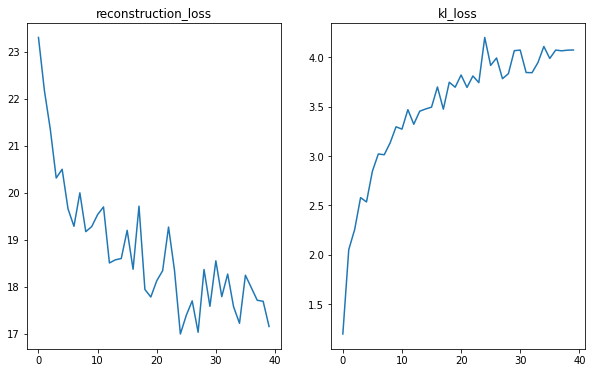

In [ ]:
vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
history = vae.fit(x_train, epochs=40, batch_size=128)
plot_loss(history)

##[TO COMPLETE] Exercise 6.5: Model Analysis
Now we can plot an example of the data generation by using the decoder part. Since we used a 2D latent space let's generate sevral possibile 2D $\hat{z}$ samples and pass them to our decoder. With the $scale$ parameter we can define the interval from where the entries of $\hat{z}$ are chosen, and with parameter $n$ it is possibile to define how many samples are generated.  

In [ ]:
def plot_latent(encoder, decoder, scale=2.0, n = 30):
     
    digit_size = 28
    figsize = 15
    figure = np.zeros((digit_size * n, digit_size * n))

    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[
                i * digit_size : (i + 1) * digit_size,
                j * digit_size : (j + 1) * digit_size,
            ] = digit

    plt.figure(figsize=(figsize, figsize))
    start_range = digit_size // 2
    end_range = n * digit_size + start_range + 1
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure, cmap="Greys_r")
    plt.show()



#[TO COMPLETE] explore what happens with different "scales"

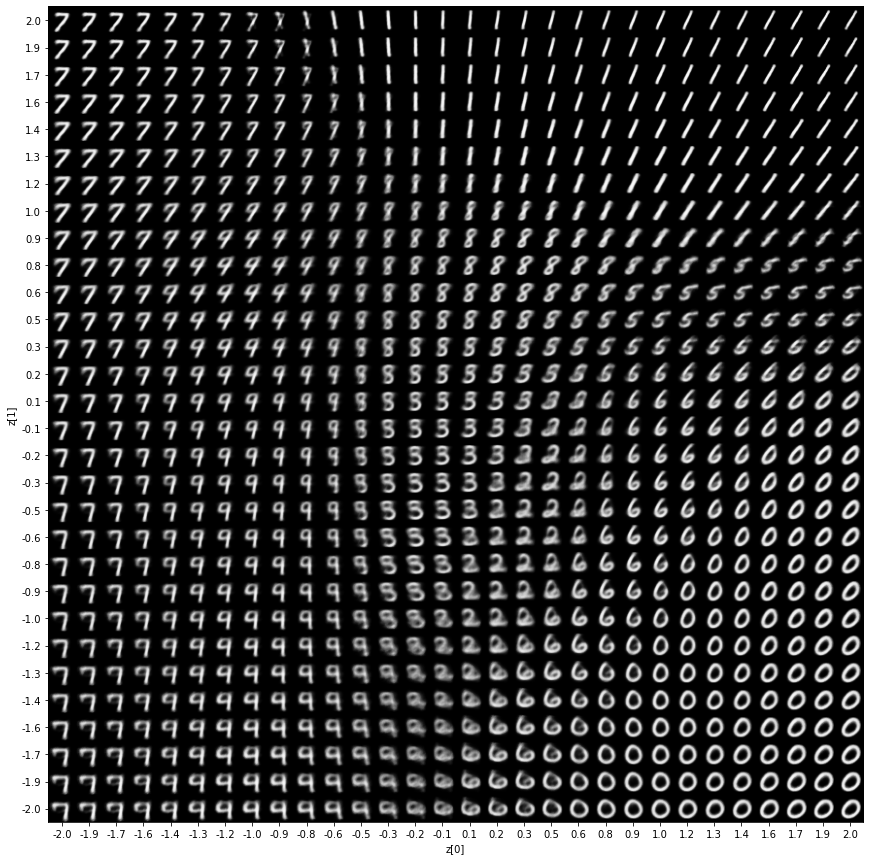

In [ ]:
plot_latent(encoder, decoder, 2.0, 30) 

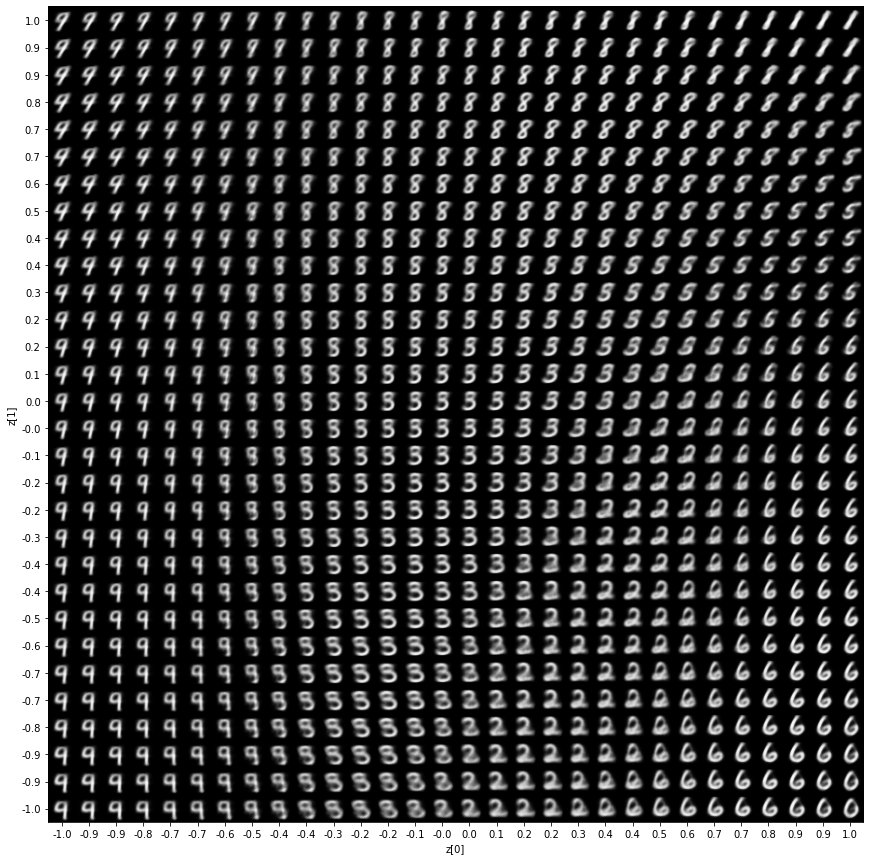

In [ ]:
plot_latent(encoder, decoder, 1.0, 30) 

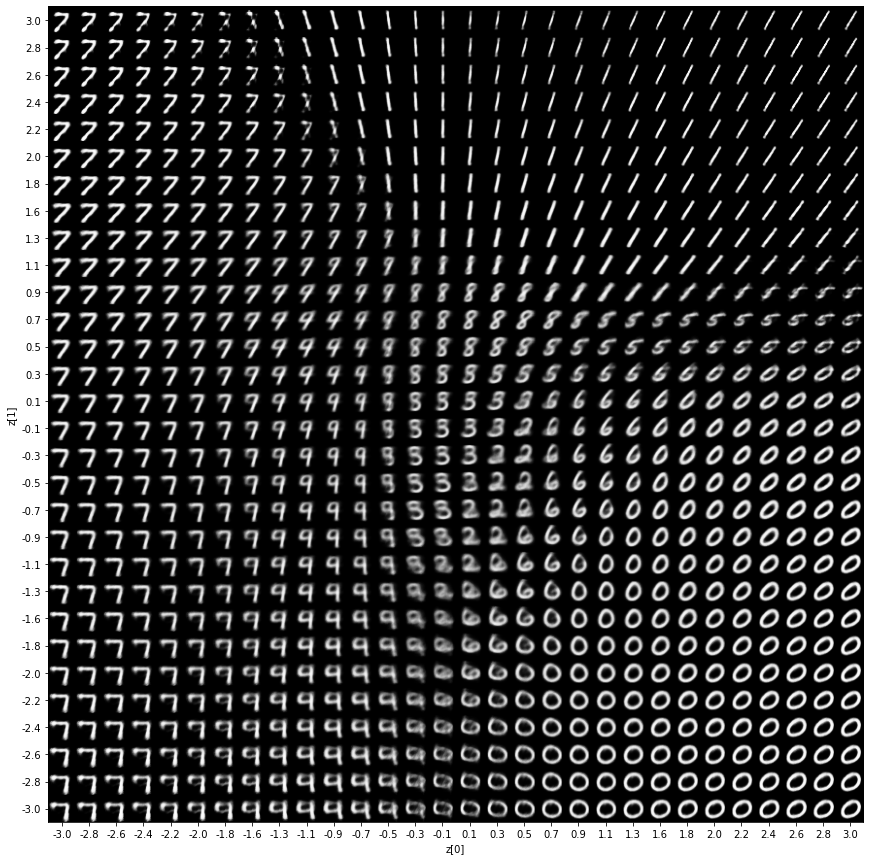

In [ ]:
plot_latent(encoder, decoder, 3.0, 30) 

The final result is quite impressive, considering that all these digits are artificial and they not belong to any dataset!
Let's finally check how the various digits have been represented in the latent space by the VAE.

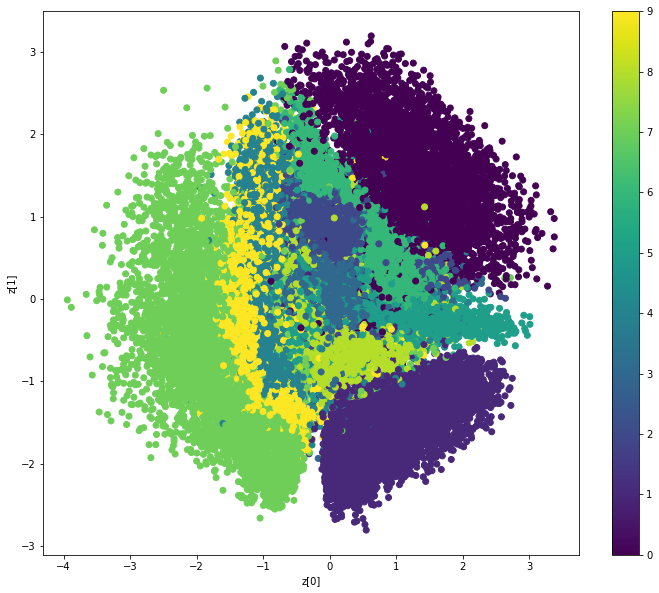

In [ ]:
def plot_label_clusters(encoder, decoder, data, labels):
    z_mean, _, _ = encoder.predict(data)
    plt.figure(figsize=(12, 10))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=labels)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.show()

plot_label_clusters(encoder, decoder, x_train, y_train)

**[TO COMPLETE]** Discuss the obtained plots, and  explore how the hyper-parameters of the VAE (number of layers, layer sizes, etc.) influence the final result. Insert your discussion into cells immediately below this one.

<h2><mark><b>Answer: (Updated) <h2><mark><b>



<!DOCTYPE html>
<html>
<head>
<style>
table, th, td {
  border: 1px solid black;
}
</style>
</head>
<body>

<p>The different experiments has been listed below:</p>

<table style="width:100%">
  <tr>
    <th>Number</th>
    <th>Number of hidden layer</th>
    <th>Encoder Activation Function</th>
    <th>Decoder Activation Function</th>
    <th>Hidden layer size</th>
    <th>Total Loss</th>
    <th>Reconstruction Loss Loss</th>
    <th>KL Loss</th>

  </tr>
  <tr>
    <th>1</th>
    <td>2</td>
    <td>Relu, Linear</td>
    <td>Relu, Relu</td>
    <td>64 , 256</td>
    <td>27.93</td>
    <td>24.13</td>
    <td>3.80</td>

  </tr>
  <tr>
    <th>2</th>
    <td>2</td>
    <td>Relu, Linear</td>
    <td>Relu, Relu</td>
    <td>128 , 256</td>
    <td>27.88</td>
    <td>24.0</td>
    <td>3.87</td>

  </tr>
  <tr>
    <th>3</th>
    <td>2</td>
    <td>Relu, Relu</td>
    <td>Relu, Relu</td>
    <td>64 , 256</td>
    <td>27.51</td>
    <td>24.47</td>
    <td>4.04</td>

  </tr>
  <tr>
    <th>4</th>
    <td>2</td>
    <td>Relu, sigmoid</td>
    <td>Relu, sigmoid</td>
    <td>64 , 256</td>
    <td>27.12</td>
    <td>22.90</td>
    <td>4.22</td>

  </tr>
  <tr>
    <th>5</th>
    <td>2</td>
    <td>sigmoid, sigmoid</td>
    <td>sigmoid, sigmoid</td>
    <td>64 , 256</td>
    <td>28.93</td>
    <td>26.27</td>
    <td>2.65</td>

  </tr>
  <tr>
    <th>6</th>
    <td>3</td>
    <td>Relu, Relu, sigmoid</td>
    <td>Relu, Relu, sigmoid</td>
    <td>64, 128 , 256</td>
    <td>28.75</td>
    <td>25.75</td>
    <td>2.99</td>

  </tr>
  <tr>
    <th>7</th>
    <td>3</td>
    <td>Relu, Relu, Relu</td>
    <td>Relu, Relu, Relu</td>
    <td>64, 128 , 256</td>
    <td>27.17</td>
    <td>22.89</td>
    <td>4.27</td>

  </tr>



  </tr>

</table>

</body>
</html>




#####I've studied VAE with 2 and 3 hidden layers as I reported the result in section two. The results with an increasing number of layers didn't get better and in one case it has a bigger total loss in comparison to two-layer VAE. 
#####By changing the size of a hidden layer in the VAE, it has been shown that it didn't have a significant impact on the VAE loss, and the result is shown a little better behavior with a more complex model.
#####Another Hyper-parameter in this network is activation functions. The results showed that the VAE configuration with relu function for hidden layer and sigmoid for output layer had better performance than other configurations.
#####Results of the 2D latent space plot showed that with fewer Scale numbers, the better results we will get. Also, by reducing batch sizes,  losses of the VAE were significantly better, but by looking at 2D plots in the last part, it has been understood that plot was really messy and can not learn the mean and variance of the different digits better even with less total and reconstruction loss.   
#####The last 2D plot gives us more information about this issue and how much our model was successful in separating the numbers in probabilistic space. Clearly, the region for numbers 5,9, or 4 is quite messy, and the model didn't learn these numbers completely well. On the other hand, for numbers like 0,1,2 or 7, it can be seen as a region that is separated better from other parts.

#####The best result achieved with two hidden layer and relu activation function and sigmoid activation function for output unit. since the results with more complex model did not have significant difference, the simpler model has been chosen to train the model. Lastly, however VAE with lower has better loss bu it did not learn the mean and variance correctly, I chose 128 for batch size.
